In [2]:
import pandas as pd # importing pandas library for reading of the data, data manipulation and analysis
import numpy as np # importing numpy for numerical and scientific operations
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Customer360Insights.csv') # Load the csv file (Customer360Insights)
df.head() # displaying the first five rows of the dataset

,SessionStart,CustomerID,FullName,Gender,Age,CreditScore,MonthlyIncome,Country,State,City,...,Price,Quantity,CampaignSchema,CartAdditionTime,OrderConfirmation,OrderConfirmationTime,PaymentMethod,SessionEnd,OrderReturn,ReturnReason
0,2019-01-01 02:42:00,1001,Brittany Franklin,Male,57,780,7591,China,Guangdong,Dongguan,...,50,4,Instagram-ads,2019-01-01 02:49:00,True,2019-01-01 03:02:00,Cash On Delivery,2019-01-01 02:53:00,False,NaN
1,2019-01-02 20:35:00,1002,Scott Stewart,Female,69,746,3912,China,Shandong,Yantai,...,80,6,Google-ads,2019-01-02 20:50:00,True,2019-01-02 20:58:00,Debit Card,2019-01-02 20:54:00,False,NaN
2,2019-01-04 03:11:00,1003,Elizabeth Fowler,Female,21,772,7460,UK,England,Birmingham,...,20,2,Facebook-ads,2019-01-04 03:30:00,True,2019-01-04 03:40:00,Cash On Delivery,2019-01-04 03:35:00,False,NaN
3,2019-01-05 09:01:00,1004,Julian Wall,Female,67,631,4765,UK,England,Birmingham,...,20,2,Twitter-ads,2019-01-05 09:17:00,True,2019-01-05 09:26:00,Cash On Delivery,2019-01-05 09:20:00,False,NaN
4,2019-01-05 13:35:00,1005,James Simmons,Male,57,630,3268,China,Shandong,Yantai,...,100,6,Billboard-QR code,2019-01-05 13:40:00,True,2019-01-05 13:52:00,Debit Card,2019-01-05 13:42:00,False,NaN


In [4]:
df['Category'].unique()

array(['electronics', 'fashion', 'toys', 'home appliances', 'books'],
      dtype=object)

In [5]:
df.columns # displaying the neccessary columns avaliable

Index(['SessionStart', 'CustomerID', 'FullName', 'Gender', 'Age',
       'CreditScore', 'MonthlyIncome', 'Country', 'State', 'City', 'Category',
       'Product', 'Cost', 'Price', 'Quantity', 'CampaignSchema ',
       'CartAdditionTime', 'OrderConfirmation', 'OrderConfirmationTime',
       'PaymentMethod', 'SessionEnd', 'OrderReturn', 'ReturnReason'],
      dtype='object')

In [6]:
df.info() # getting full info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   SessionStart           2000 non-null   object
 1   CustomerID             2000 non-null   int64 
 2   FullName               2000 non-null   object
 3   Gender                 2000 non-null   object
 4   Age                    2000 non-null   int64 
 5   CreditScore            2000 non-null   int64 
 6   MonthlyIncome          2000 non-null   int64 
 7   Country                2000 non-null   object
 8   State                  2000 non-null   object
 9   City                   2000 non-null   object
 10  Category               2000 non-null   object
 11  Product                2000 non-null   object
 12  Cost                   2000 non-null   int64 
 13  Price                  2000 non-null   int64 
 14  Quantity               2000 non-null   int64 
 15  CampaignSchema       

# Handling Missing Values

<Axes: >

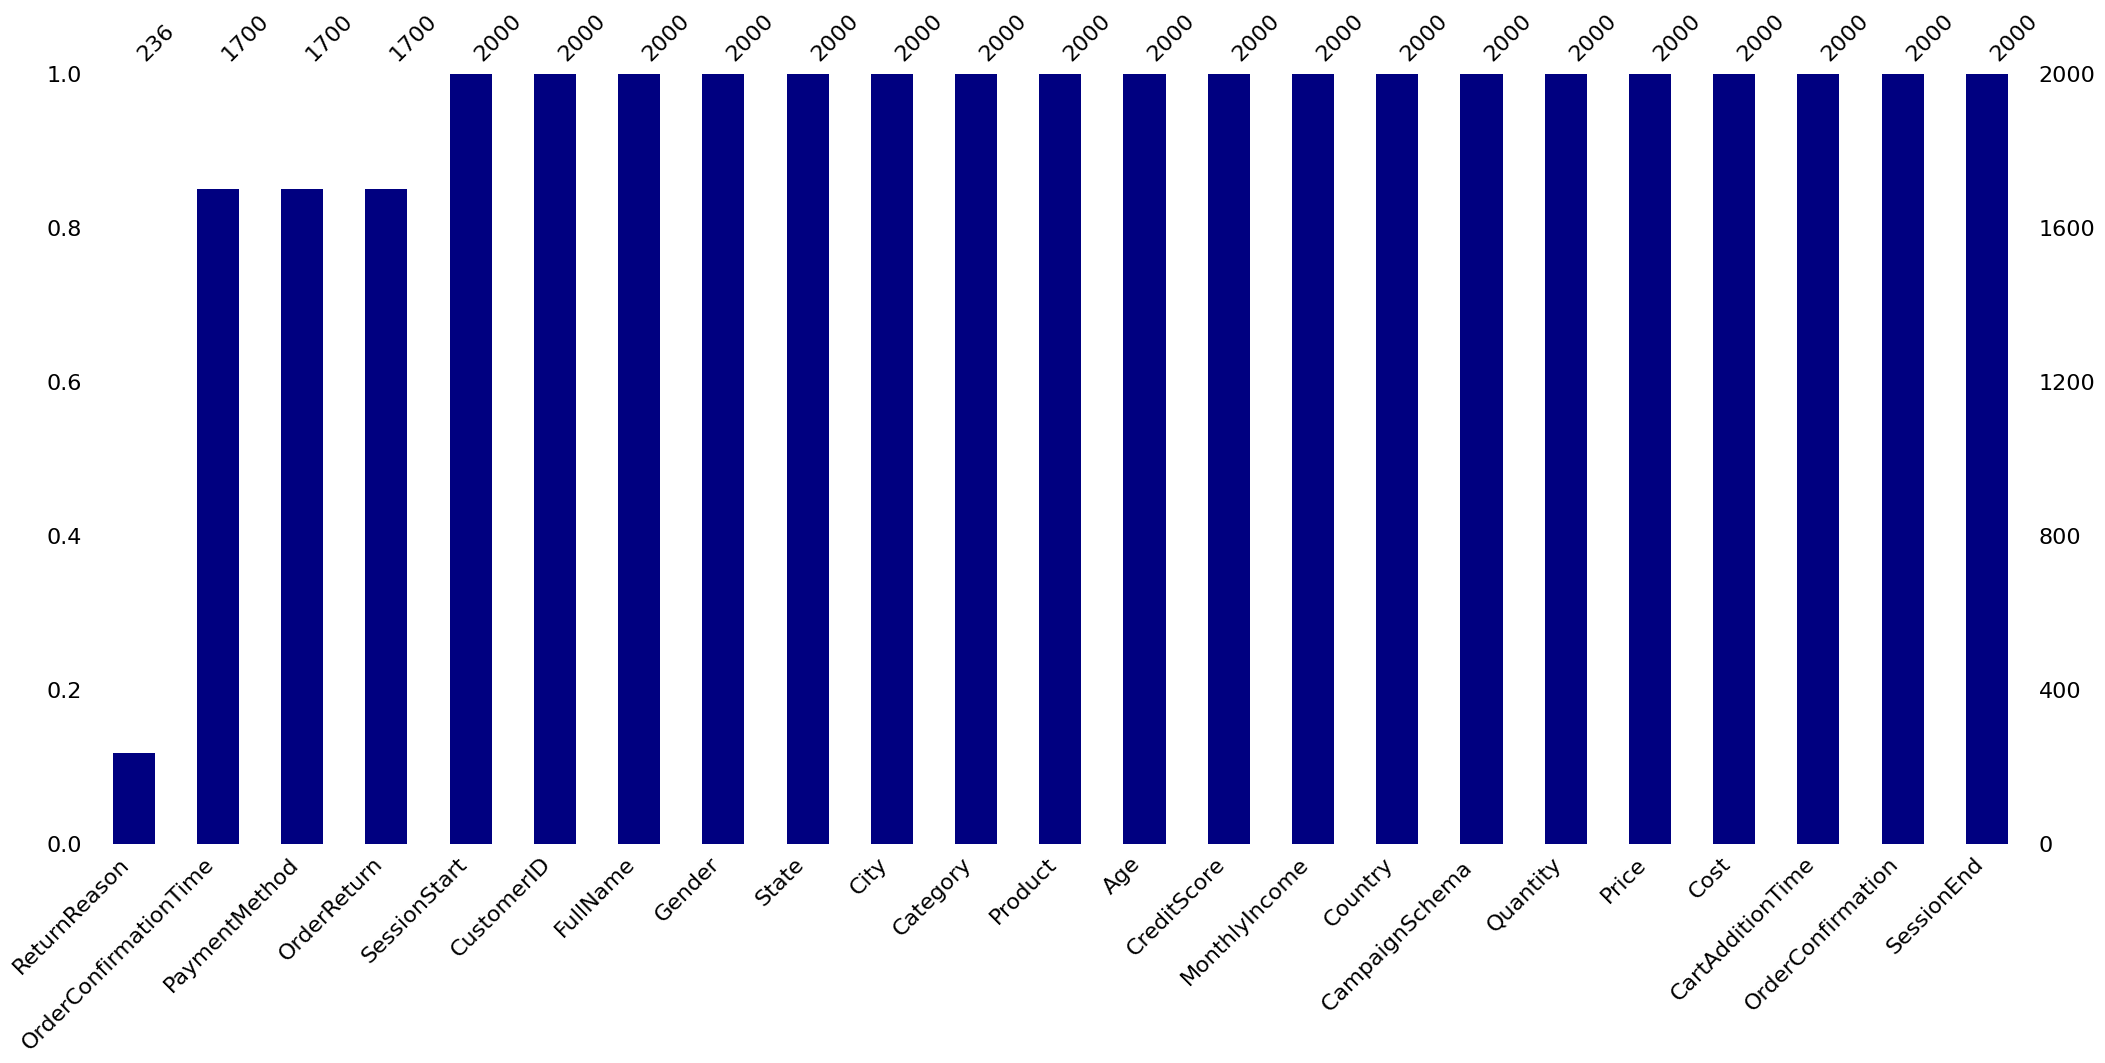

In [7]:
# Checking for missing value using missingno module
import missingno as msn
msn.bar(df,color = 'navy', sort='ascending')


In [8]:
# Fill missing 'OrderConfirmationTime', 'PaymentMethod', 'ReturnReason' and 'OrderReturn' with 'Unknown'
df['OrderConfirmationTime'].fillna('Unknown', inplace=True)
df['PaymentMethod'].fillna('Unknown', inplace=True)
df['OrderReturn'].fillna('Unknown', inplace=True)
df['ReturnReason'].fillna('Unknown', inplace=True)

# Handling Outliers


In [9]:
# Define a function to cap outliers
def cap_outliers(series, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = series.quantile(lower_percentile)
    upper_bound = series.quantile(upper_percentile)
    return np.clip(series, lower_bound, upper_bound)

In [10]:
# Cap outliers for numeric columns
df['CreditScore'] = cap_outliers(df['CreditScore'])
df['MonthlyIncome'] = cap_outliers(df['MonthlyIncome'])
df['Cost'] = cap_outliers(df['Cost'])
df['Price'] = cap_outliers(df['Price'])
df['Quantity'] = cap_outliers(df['Quantity'])

# Feature Engineering & Data Transformation

In [11]:
# Convert date columns to datetime format
df['SessionStart'] = pd.to_datetime(df['SessionStart'])
df['CartAdditionTime'] = pd.to_datetime(df['CartAdditionTime'])
df['OrderConfirmationTime'] = pd.to_datetime(df['OrderConfirmationTime'], errors='coerce')
df['SessionEnd'] = pd.to_datetime(df['SessionEnd'])

In [12]:
# Calculate session duration
df['SessionDuration'] = (df['SessionEnd'] - df['SessionStart']).dt.total_seconds() / 60


In [13]:
# Extract year, month, day from session start
df['SessionYear'] = df['SessionStart'].dt.year
df['SessionMonth'] = df['SessionStart'].dt.month
df['SessionDay'] = df['SessionStart'].dt.day


In [14]:
# Encode categorical variables
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [15]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables using Label Encoder
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Country', 'State', 'Category', 'PaymentMethod']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [16]:
df.head()

,SessionStart,CustomerID,FullName,Gender,Age,CreditScore,MonthlyIncome,Country,State,City,...,OrderConfirmation,OrderConfirmationTime,PaymentMethod,SessionEnd,OrderReturn,ReturnReason,SessionDuration,SessionYear,SessionMonth,SessionDay
0,2019-01-01 02:42:00,1001,Brittany Franklin,1,57,769,7591.0,2,4,Dongguan,...,True,2019-01-01 03:02:00,0,2019-01-01 02:53:00,False,Unknown,11.0,2019,1,1
1,2019-01-02 20:35:00,1002,Scott Stewart,0,69,746,3912.0,2,13,Yantai,...,True,2019-01-02 20:58:00,2,2019-01-02 20:54:00,False,Unknown,19.0,2019,1,2
2,2019-01-04 03:11:00,1003,Elizabeth Fowler,0,21,769,7460.0,7,3,Birmingham,...,True,2019-01-04 03:40:00,0,2019-01-04 03:35:00,False,Unknown,24.0,2019,1,4
3,2019-01-05 09:01:00,1004,Julian Wall,0,67,631,4765.0,7,3,Birmingham,...,True,2019-01-05 09:26:00,0,2019-01-05 09:20:00,False,Unknown,19.0,2019,1,5
4,2019-01-05 13:35:00,1005,James Simmons,1,57,630,3286.8,2,13,Yantai,...,True,2019-01-05 13:52:00,2,2019-01-05 13:42:00,False,Unknown,7.0,2019,1,5


In [17]:
df.to_csv('Customer360InsightsCleaned.csv', index=False)